In [15]:
%load_ext autoreload  
%autoreload 2  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


amp =  6.308676e-05
e =  0.4899339
omega =  85.01659
P =  34088.62
T0 =  39628.1
a =  -2.330288e-11
b =  -3.563066e-06


(<Figure size 1000x540 with 1 Axes>, <Axes: xlabel='Cycle', ylabel='O−C'>)

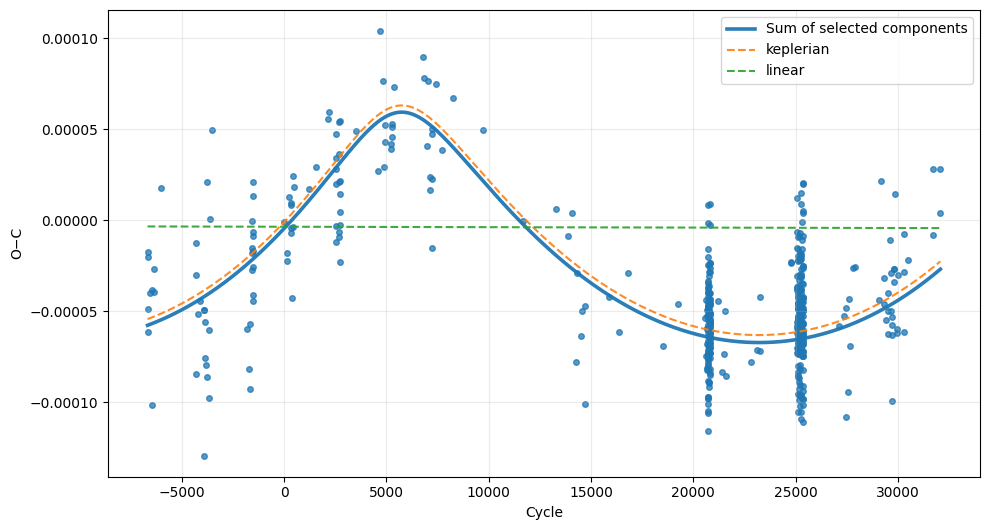

In [16]:
from ocpy.data import Data
from ocpy.oc import Keplerian, Linear, Parameter

# Dosya yolu
file_path = "dd_crb.csv"

# 'dd_crb.csv' dosyasına özel sütun eşleştirmeleri
column_mapping = {
    "Mintimes": "minimum_time",      # Zamanlar
    "Errors": "minimum_time_error",  # Hatalar
    "Mintypes": "minimum_type",      # Minima türü (0, 1 vb.)
    "Data_group": "labels"           # Gözlem grupları/Kaynaklar
}

# 1. Data nesnesini oluştur
data = Data.from_file(file_path, columns=column_mapping)

# Ağırlıkları hata paylarına göre hesapla (dosyada 'Errors' olduğu için yapılabilir)
if data.data["minimum_time_error"].notna().all():
    data = data.calculate_weights()

# 2. OCPyMC nesnesini oluştur
# Bu dosyadaki verilere uygun yaklaşık T0 ve Periyot değerleri:
t0 = 2455611.92657 
period = 0.161770446 

oc = data.calculate_oc(
    reference_minimum=t0,
    reference_period=period,
    model_type="lmfit"
)

# LiTE (Keplerian) tablodan
kep = Keplerian(
    amp=Parameter(
        value=6.308676e-05,
        std=4e-5,
        min=0.0,
        max=1e-4,
        fixed=False,
    ),
    e=Parameter(
        value=4.899339e-01,
        std=3e-1,
        min=0.0,
        max=0.95,
        fixed=False,
    ),
    omega=Parameter(
        value=8.501659e+01,   # 85.01659 deg
        std=180,
        min=0.0,
        max=360.0,
        fixed=False,
    ),
    P=Parameter(
        value=3.408862e+04,
        std=10000,
        min=20000,
        fixed=False,
    ),
    T0=Parameter(
        value=3.962810e+04,
        std=30000,
        fixed=False,
    ),
)

# Linear tablodan (dP, dT)
lin = Linear(
    a=Parameter(
        value=-2.330288e-11,
        std=1e-9,
        min=-1e-9,
        fixed=False,
    ),
    b=Parameter(
        value=-3.563066e-06,
        std=1e-4,
        min=-1e-4,
        fixed=False,
    ),
)

oc.plot_components_on_data([kep, lin])


In [17]:
from ocpy.oc import Linear, Quadratic, Keplerian, KeplerianOld, Parameter

res = oc.fit([kep,lin])

amp =  6.308676e-05
e =  0.4899339
omega =  85.01659
P =  34088.62
T0 =  39628.1
a =  -2.330288e-11
b =  -3.563066e-06
amp =  6.308676e-05
e =  0.4899339
omega =  85.01659
P =  34088.62
T0 =  39628.1
a =  -2.330291515306726e-11
b =  -3.5630660000229852e-06
amp =  6.308676e-05
e =  0.4899339
omega =  85.01659
P =  34088.62
T0 =  39628.1
a =  -2.330291515306726e-11
b =  -3.5630660000229852e-06
amp =  6.308676e-05
e =  0.4899339
omega =  85.01659
P =  34088.62
T0 =  39628.1
a =  -2.330291515306726e-11
b =  -3.5630660000229852e-06
amp =  6.308688779393121e-05
e =  0.4899339
omega =  85.01659
P =  34088.62
T0 =  39628.1
a =  -2.330291515306726e-11
b =  -3.5630660000229852e-06
amp =  6.308676e-05
e =  0.4899340492897745
omega =  85.01659
P =  34088.62
T0 =  39628.1
a =  -2.330291515306726e-11
b =  -3.5630660000229852e-06
amp =  6.308676e-05
e =  0.4899339
omega =  85.01743992757913
P =  34088.62
T0 =  39628.1
a =  -2.330291515306726e-11
b =  -3.5630660000229852e-06
amp =  6.308676e-05
e =  0

amp =  6.291064916785347e-05
e =  0.6971182789282284
omega =  5.741920938717726e-08
P =  30363.1471949736
T0 =  30473.8940873704
a =  -9.949747692417077e-10
b =  -7.66920536321436e-06
amp =  6.291064916785347e-05
e =  0.6971182789282284
omega =  5.741920938717726e-08
P =  30363.1471949736
T0 =  30473.8940873704
a =  -9.949747692417077e-10
b =  -7.66920536321436e-06


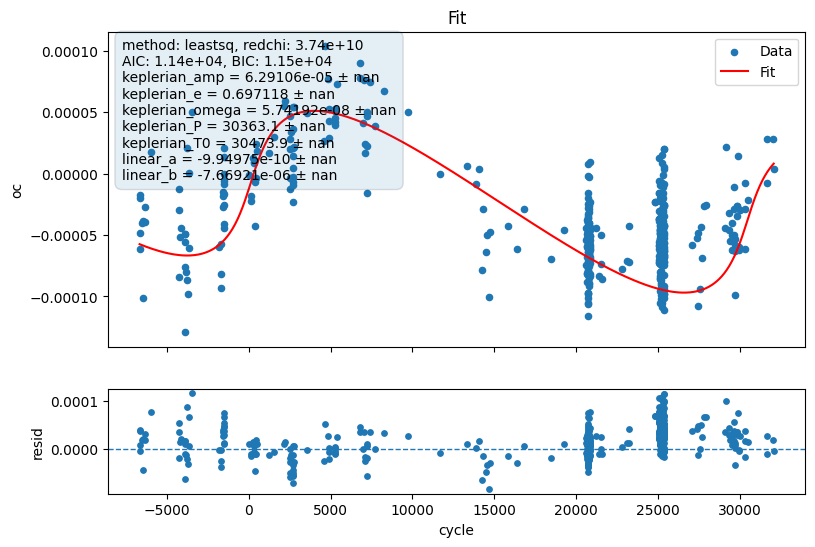

In [18]:
oc.fit_and_report(res)

In [19]:
res

In [20]:
oc.create_corner_plot(res)

AttributeError: 'OCLMFit' object has no attribute 'create_corner_plot'

In [ ]:
res.posterior.median()

<xarray.Dataset> Size: 64B
Dimensions:           ()
Data variables:
    keplerian1_T      float64 8B 3.626e+04
    keplerian1_amp    float64 8B 5.766e-05
    keplerian1_e      float64 8B 0.5312
    keplerian1_omega  float64 8B 68.21
    keplerian1_P      float64 8B 3.157e+04
    linear2_a         float64 8B -6.173e-10
    linear2_b         float64 8B 6.221e-06
    y_model           float64 8B -6.202e-05